11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 52s 4us/step


C:\Users\sherl\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9126 - loss: 0.3110 - val_accuracy: 0.9544 - val_loss: 0.1610
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9605 - loss: 0.1351 - val_accuracy: 0.9655 - val_loss: 0.1120
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9729 - loss: 0.0918 - val_accuracy: 0.9724 - val_loss: 0.0933
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5386 - loss: 1.9710 - val_accuracy: 0.7303 - val_loss: 1.6676
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7539 - loss: 1.4459 - val_accuracy: 0.7993 - val_loss: 1.2266
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8024 - loss: 1.0969 - val_accuracy: 0.8273 - val_loss: 0.9553
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9033 - loss: 0.3397 - val_accuracy: 0.9385 - val_loss: 0.2108
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9498 - loss: 0.1764 - val_accuracy: 0.956

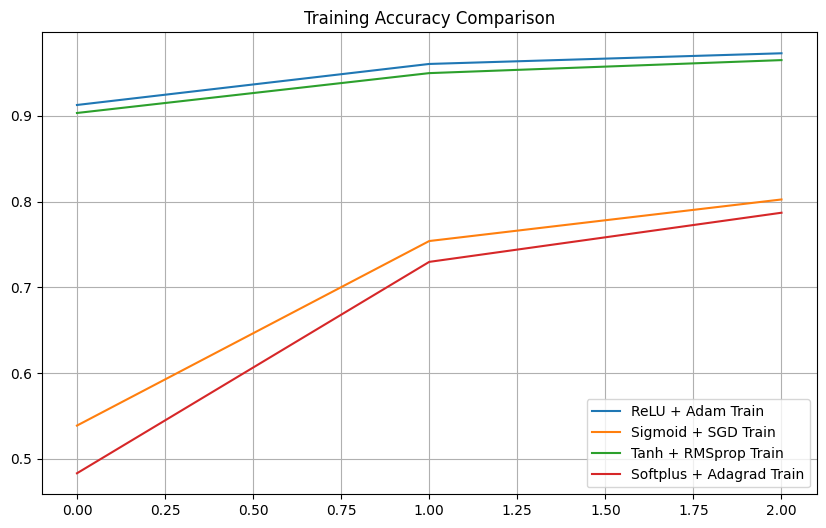

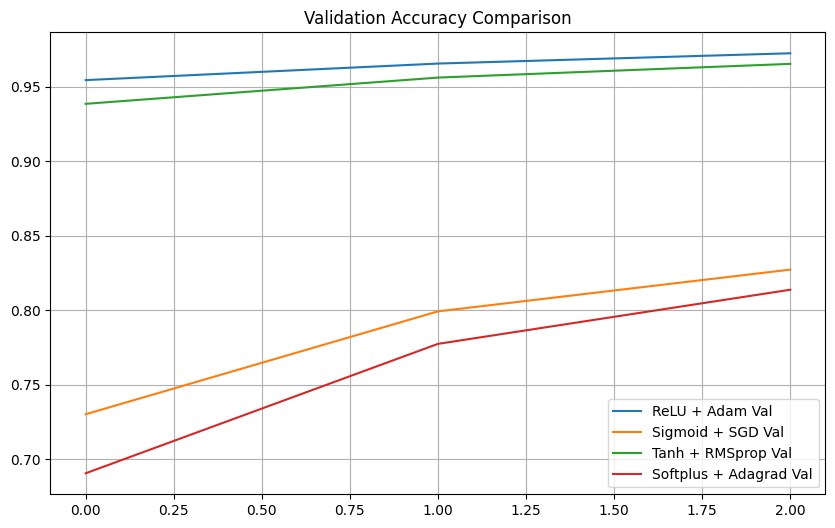

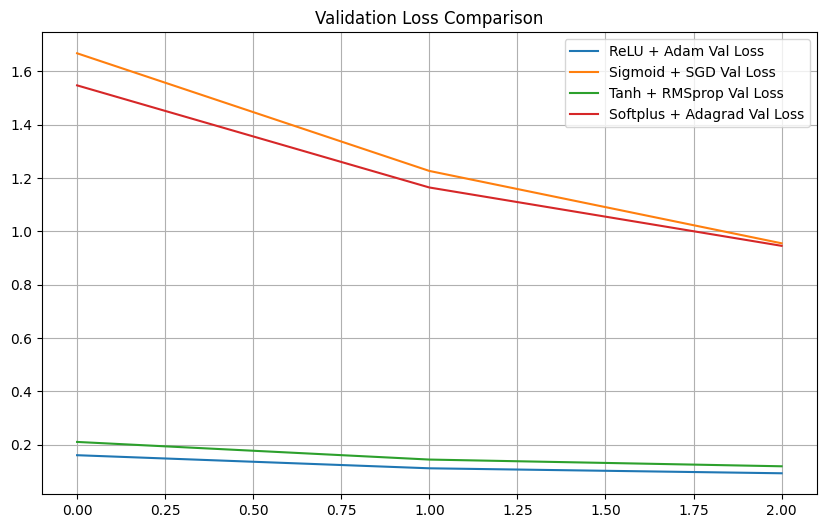

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32").reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.astype("float32").reshape(-1, 28, 28, 1) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_model(act, opt):
    m = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(256, activation=act, kernel_initializer="he_uniform"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    m.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return m

configs = [
    ("relu", tf.keras.optimizers.Adam(), "ReLU + Adam"),
    ("sigmoid", tf.keras.optimizers.SGD(), "Sigmoid + SGD"),
    ("tanh", tf.keras.optimizers.RMSprop(), "Tanh + RMSprop"),
    ("softplus", tf.keras.optimizers.Adagrad(), "Softplus + Adagrad"),
]

histories = {}

for act, opt, name in configs:
    model = build_model(act, opt)
    h = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                  epochs=3, batch_size=128, verbose=1)
    histories[name] = h

plt.figure(figsize=(10,6))
for name, h in histories.items():
    plt.plot(h.history['accuracy'], label=f'{name} Train')
plt.title("Training Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for name, h in histories.items():
    plt.plot(h.history['val_accuracy'], label=f'{name} Val')
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for name, h in histories.items():
    plt.plot(h.history['val_loss'], label=f'{name} Val Loss')
plt.title("Validation Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()




------ Training: ReLU + Adam ------
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9258 - loss: 0.2525 - val_accuracy: 0.9634 - val_loss: 0.1214
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9678 - loss: 0.1066 - val_accuracy: 0.9676 - val_loss: 0.1001
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9767 - loss: 0.0752 - val_accuracy: 0.9741 - val_loss: 0.0841


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)



------ Training: Sigmoid + SGD ------
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5884 - loss: 1.8229 - val_accuracy: 0.7629 - val_loss: 1.3401
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8023 - loss: 1.0534 - val_accuracy: 0.8371 - val_loss: 0.8171
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8438 - loss: 0.7206 - val_accuracy: 0.8626 - val_loss: 0.6156


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,324 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)



------ Training: Tanh + RMSprop ------
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9112 - loss: 0.3007 - val_accuracy: 0.9469 - val_loss: 0.1760
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9589 - loss: 0.1376 - val_accuracy: 0.9664 - val_loss: 0.1121
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9717 - loss: 0.0952 - val_accuracy: 0.9682 - val_loss: 0.1005


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,646 (2.05 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,324 (1.03 MB)



------ Training: Softplus + Adagrad ------
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5415 - loss: 1.7614 - val_accuracy: 0.7387 - val_loss: 1.2811
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7782 - loss: 1.0571 - val_accuracy: 0.8213 - val_loss: 0.8476
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8273 - loss: 0.7654 - val_accuracy: 0.8490 - val_loss: 0.6573


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,646 (2.05 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,324 (1.03 MB)



------ Training: LeakyReLU + Adadelta ------
Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1009 - loss: 2.3680 - val_accuracy: 0.1336 - val_loss: 2.3004
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.1738 - loss: 2.2442 - val_accuracy: 0.2305 - val_loss: 2.1798
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2758 - loss: 2.1308 - val_accuracy: 0.3384 - val_loss: 2.0683


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

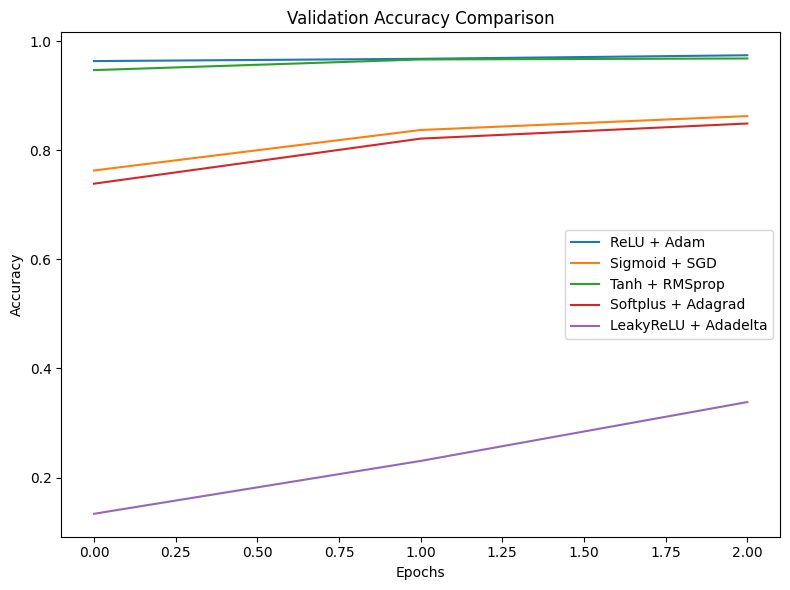

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import HeUniform
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# MODEL BUILDING FUNCTION 
def build_model(activation_layer, optimizer):
    model = Sequential([
        Flatten(input_shape=(28,28,1)),
        Dense(256, kernel_initializer=HeUniform()),
        activation_layer,
        Dense(10, activation="softmax", kernel_initializer=HeUniform())
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

#MODELS WITH DIFFERENT ACTIVATIONS 
models = {
    "ReLU + Adam": build_model(Dense(256, activation="relu"), tf.keras.optimizers.Adam()),
    "Sigmoid + SGD": build_model(Dense(256, activation="sigmoid"), tf.keras.optimizers.SGD()),
    "Tanh + RMSprop": build_model(Dense(256, activation="tanh"), tf.keras.optimizers.RMSprop()),
    "Softplus + Adagrad": build_model(Dense(256, activation="softplus"), tf.keras.optimizers.Adagrad()),
    "LeakyReLU + Adadelta": build_model(LeakyReLU(0.1), tf.keras.optimizers.Adadelta())
}

histories = {}

#TRAINING LOOP 
for name, model in models.items():
    print(f"\n\n------ Training: {name} ------")
    histories[name] = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=3, batch_size=128, verbose=1
    )
    model.summary()

# ===================== PLOT ACCURACY COMPARISON =====================
plt.figure(figsize=(8,6))
for name, hist in histories.items():
    plt.plot(hist.history["val_accuracy"], label=name)
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 